In [1]:
%matplotlib inline
from sklearn_model_eval import plots

import numpy as np
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

## Plotting confusion matrix
Example taken from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

/Users/Edu/Envs/sklearn_model_eval/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


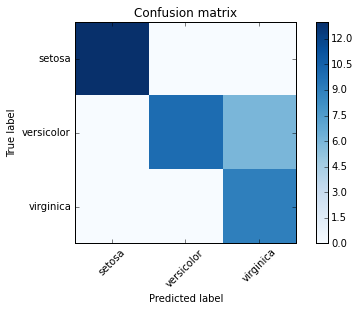

In [3]:
plots.confusion_matrix_(y_test, y_pred, target_names=iris.target_names)

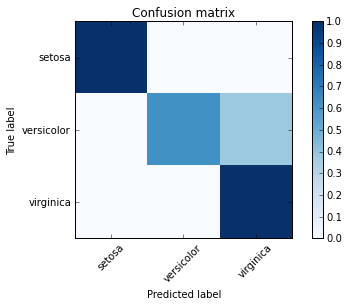

In [5]:
plots.confusion_matrix_(y_test, y_pred, target_names=iris.target_names, normalize=True)

## Receiver operating characteristic (ROC)
Related example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [6]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
#y = label_binarize(y, classes=[0, 1, 2])
#n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

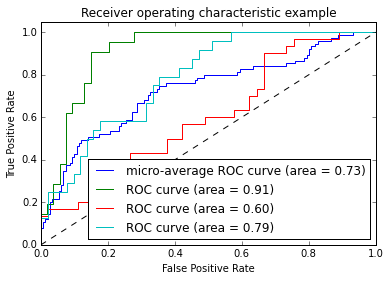

In [7]:
plots.roc(y_test, y_score)

In [8]:
plots.roc(y_test[:,0], y_score[:,0])

IndexError: too many indices for array

In [9]:
plots.roc(y_test[:,1], y_score[:,1])

IndexError: too many indices for array

In [10]:
plots.roc(y_test[:,2], y_score[:,2])

IndexError: too many indices for array

## Precision-Recall
Related example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [22]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
#y = label_binarize(y, classes=[0, 1, 2])
#n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=random_state)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

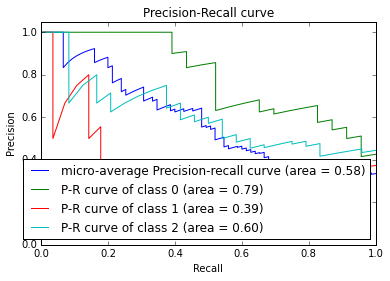

In [12]:
plots.precision_recall(y_test, y_score)

In [13]:
plots.precision_recall(y_test[:,0], y_score[:,0])

IndexError: too many indices for array

In [14]:
plots.precision_recall(y_test[:,1], y_score[:,1])

IndexError: too many indices for array

In [15]:
plots.precision_recall(y_test[:,2], y_score[:,2])

IndexError: too many indices for array

## Feature importance
Example taken from: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [16]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest = forest.fit(X, y)

#Since we don't have labeled features, just create a list of numbers
feature_list = range(10)

In [17]:
plots.feature_importance(forest, feature_list)

AttributeError: 'module' object has no attribute 'feature_importances_table'

In [18]:
plots.feature_importance(forest, feature_list, n=3)

AttributeError: 'module' object has no attribute 'feature_importances_table'